# Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fix the error
sns.set_theme(style="whitegrid")

Logistic regression model estimated probability

$\hat{p}=h_\theta(x)=\sigma(x^T \theta)$


The logistic function

$\sigma(t)=\frac{1}{1+e^{-t}}$ where $t = x^T \theta$

$\hat{y}=\begin{cases} 0 & \text{if } \hat{p}<0.5 \\ 1 & \text{if } \hat{p}\geq 0.5 \end{cases}$

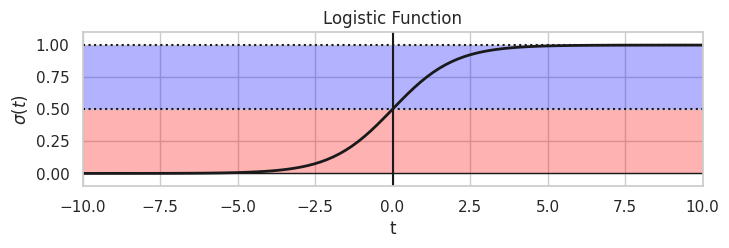

In [3]:
t = np.linspace(-10, 10, 100)
s = 1 / (1 + np.exp(-t))

# logistic function
_, ax = plt.subplots(figsize=(8, 2))
ax.plot(t, s, lw=2, color='k')

ax.axvline(0, color='k')
ax.axhline(y=0, color='k', lw=1)
ax.axhline(y=0.5, ls='dotted', color='k')
ax.axhline(y=1, ls='dotted', color='k')
ax.axhspan(0, 0.5, facecolor='red', alpha=0.3)
ax.axhspan(0.5, 1, facecolor='blue', alpha=0.3)

ax.set_xlabel('t'), ax.set_ylabel('$\\sigma(t)$')
ax.set_xlim(-10, 10), ax.set_ylim(-0.1, 1.1)
ax.set_title('Logistic Function')
plt.show()

# logit
# logit = np.log(s / (1 - s))
# _, ax = plt.subplots(figsize=(2, 8))
# ax.plot(s, logit, lw=2, color='k')
# ax.set_title('Logit Function')
# ax.set_xlabel('$\\sigma(t)$')
# ax.set_ylabel('$logit(\\sigma(t))$')

# plt.show()

Just to be clear here, 

- **direct result**: $t = x^T \theta$, the direct result of multiplying the feature vector $x$ by the weight vector $\theta$.
- **the logistic function**: $\hat{p} = \sigma(t)$ is the logistic function where the range is between 0 and 1 (the probability of getting 1)
- **the prediction**: finally, if $t < 0$, then $\hat{p} < 0.5$, then $\hat{y}=0$ - $\hat{y}$ is the prediction of the model.
- **the cost function**:
    - For a single training instance: $c(\theta) = -y\log(\hat{p})-(1-y)\log(1-\hat{p})$
    - For the whole training  (the **Log Loss**): $J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}\log(\hat{p}^{(i)})+(1-y^{(i)})\log(1-\hat{p}^{(i)})]$
        - the partial derivative (how much of cost changes if we change $\theta_j$ just slightly):
        $$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m(\sigma(x^{(i)})-y^{(i)})x_j^{(i)}$$
    - note that $y$ is from the actual training set, and $\hat{p}$ is from the model's prediction (pretty smart :o)
        - if $y$ is 1 - as 

/tmp/ipykernel_2944929/1698189771.py:6: RuntimeWarning: divide by zero encountered in log
  c_1 = -y_1*np.log(p) - (1-y_1)*np.log(1-p)
/tmp/ipykernel_2944929/1698189771.py:6: RuntimeWarning: invalid value encountered in multiply
  c_1 = -y_1*np.log(p) - (1-y_1)*np.log(1-p)
/tmp/ipykernel_2944929/1698189771.py:7: RuntimeWarning: divide by zero encountered in log
  c_0 = -y_0*np.log(p) - (1-y_0)*np.log(1-p)
/tmp/ipykernel_2944929/1698189771.py:7: RuntimeWarning: invalid value encountered in multiply
  c_0 = -y_0*np.log(p) - (1-y_0)*np.log(1-p)


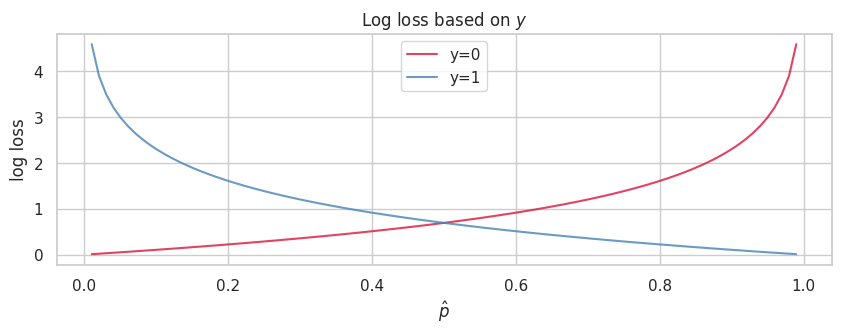

In [29]:
p = np.linspace(0, 1, 100).reshape(-1,1)
y_1 = np.ones((100, 1))
y_0 = np.zeros((100, 1))


c_1 = -y_1*np.log(p) - (1-y_1)*np.log(1-p)
c_0 = -y_0*np.log(p) - (1-y_0)*np.log(1-p)

_, ax = plt.subplots(figsize=(10, 3))
ax.plot(p, c_0, color='crimson', label='y=0', alpha=0.8)
ax.plot(p, c_1, color='steelblue', label='y=1', alpha=0.8)
ax.set_xlabel('$\hat{p}$')
ax.set_ylabel('log loss')
ax.set_title('Log loss based on $y$')
plt.legend()
plt.show()


Here's the thing:

- if $y == 1$, then we expect $\hat{p}$ to be high, and to be penalized less. As we see here, it's penalized less and less as $\hat{p}$ gets closer to 1.
    - but if $\hat{p}$ is low (indicating "lesser probability of getting 1"), then we want to penalize it more and more. As we see here, it's penalized more and more as $\hat{p}$ gets closer to 0.

Similarly, when $y == 0$, the opposite happens.

In [30]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']